## Using Census Racial demographics data 
i decided to revisit this demograsphics data set because I wanted to take a closer look at El sereno. I intentionallly wanted to figure out how to only map that section in order to use late with our vacant lot data.

I will be importing the librries and data set below.

In [1]:
# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
race = gpd.read_file('acs2019_5yr_B03002_14000US06037222001.geojson')

In [3]:
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [4]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [5]:
race = race[columns_to_keep]

race.head(5)

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,5193136.0,2641770.0,790252.0,20831.0,1454769.0,24597.0,32413.0,228504.0,4888434.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [6]:
# drop the row with index 0
race = race.drop([0])

In [7]:
race.head

<bound method NDFrame.head of                    geoid                                   name  B03002001  \
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     4283.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     3405.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     6347.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3702.0   
5     14000US06037101300     Census Tract 1013, Los Angeles, CA     3884.0   
...                  ...                                    ...        ...   
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA     1175.0   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA       16.0   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA        0.0   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA        0.0   

      B03002002  B03002003  B0300

In [8]:
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [9]:
race.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [10]:
race.head(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I will focus on El sereno neighborhiod that is in the census tracts: 201200,201301,201302,201401,201402,20110,201120, 203100, 201601, 201602, 201504,201503,201501 and later overlay it with our vacant lots that my partner is working on, including the communiy boundaries.

In [11]:
race[race.geoid == '14000US06037201200']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
497,14000US06037201200,"Census Tract 2012, Los Angeles, CA",2893.0,537.0,207.0,0.0,0.0,311.0,0.0,0.0,19.0,2356.0,"MULTIPOLYGON (((-118.18421 34.08673, -118.1836..."


In [12]:
race[race.geoid == '14000US06037201301']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
498,14000US06037201301,"Census Tract 2013.01, Los Angeles, CA",4498.0,1040.0,225.0,102.0,0.0,710.0,0.0,3.0,0.0,3458.0,"MULTIPOLYGON (((-118.19304 34.08590, -118.1929..."


In [13]:
race[race.geoid == '14000US06037201302']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
499,14000US06037201302,"Census Tract 2013.02, Los Angeles, CA",4341.0,3205.0,910.0,240.0,0.0,1825.0,0.0,78.0,152.0,1136.0,"MULTIPOLYGON (((-118.19032 34.09492, -118.1900..."


In [14]:
race[race.geoid == '14000US06037201401']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
500,14000US06037201401,"Census Tract 2014.01, Los Angeles, CA",4693.0,1143.0,325.0,47.0,152.0,470.0,0.0,0.0,149.0,3550.0,"MULTIPOLYGON (((-118.19377 34.07560, -118.1937..."


In [15]:
race[race.geoid == '14000US06037201402']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
501,14000US06037201402,"Census Tract 2014.02, Los Angeles, CA",4995.0,1280.0,190.0,42.0,0.0,948.0,0.0,53.0,47.0,3715.0,"MULTIPOLYGON (((-118.19634 34.06547, -118.1963..."


In [16]:
race[race.geoid == '14000US06037201110']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
495,14000US06037201110,"Census Tract 2011.10, Los Angeles, CA",2147.0,515.0,232.0,14.0,0.0,269.0,0.0,0.0,0.0,1632.0,"MULTIPOLYGON (((-118.18109 34.09448, -118.1803..."


In [17]:
race[race.geoid == '14000US06037201120']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
496,14000US06037201120,"Census Tract 2011.20, Los Angeles, CA",4144.0,817.0,362.0,54.0,0.0,331.0,0.0,9.0,61.0,3327.0,"MULTIPOLYGON (((-118.17043 34.09075, -118.1704..."


In [18]:
race[race.geoid == '14000US06037203100']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
508,14000US06037203100,"Census Tract 2031, Los Angeles, CA",4498.0,237.0,40.0,58.0,0.0,95.0,0.0,15.0,29.0,4261.0,"MULTIPOLYGON (((-118.20288 34.05456, -118.2028..."


In [19]:
race[race.geoid == '14000US06037201601']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
505,14000US06037201601,"Census Tract 2016.01, Los Angeles, CA",2323.0,470.0,109.0,59.0,0.0,222.0,0.0,17.0,63.0,1853.0,"MULTIPOLYGON (((-118.18053 34.07118, -118.1804..."


In [20]:
race[race.geoid == '14000US06037201602']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
506,14000US06037201602,"Census Tract 2016.02, Los Angeles, CA",2960.0,485.0,103.0,3.0,25.0,330.0,0.0,0.0,24.0,2475.0,"MULTIPOLYGON (((-118.17714 34.07733, -118.1751..."


In [21]:
race[race.geoid == '14000US06037201504']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
504,14000US06037201504,"Census Tract 2015.04, Los Angeles, CA",2302.0,474.0,242.0,23.0,0.0,125.0,0.0,0.0,84.0,1828.0,"MULTIPOLYGON (((-118.17823 34.07788, -118.1781..."


In [22]:
race[race.geoid == '14000US06037201501']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
502,14000US06037201501,"Census Tract 2015.01, Los Angeles, CA",5367.0,925.0,502.0,55.0,0.0,340.0,0.0,18.0,10.0,4442.0,"MULTIPOLYGON (((-118.17225 34.08884, -118.1717..."


In [23]:
race[race.geoid == '14000US06037201503']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
503,14000US06037201503,"Census Tract 2015.03, Los Angeles, CA",3364.0,455.0,178.0,36.0,0.0,241.0,0.0,0.0,0.0,2909.0,"MULTIPOLYGON (((-118.17807 34.08644, -118.1770..."


Now, I hope that I can trim my dataframe to map the census tracts of El Sereno to analyse the demographics of this specific area.

In [24]:
race_new = race.loc[[496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 508]]

race_new

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
496,14000US06037201120,"Census Tract 2011.20, Los Angeles, CA",4144.0,817.0,362.0,54.0,0.0,331.0,0.0,9.0,61.0,3327.0,"MULTIPOLYGON (((-118.17043 34.09075, -118.1704..."
497,14000US06037201200,"Census Tract 2012, Los Angeles, CA",2893.0,537.0,207.0,0.0,0.0,311.0,0.0,0.0,19.0,2356.0,"MULTIPOLYGON (((-118.18421 34.08673, -118.1836..."
498,14000US06037201301,"Census Tract 2013.01, Los Angeles, CA",4498.0,1040.0,225.0,102.0,0.0,710.0,0.0,3.0,0.0,3458.0,"MULTIPOLYGON (((-118.19304 34.08590, -118.1929..."
499,14000US06037201302,"Census Tract 2013.02, Los Angeles, CA",4341.0,3205.0,910.0,240.0,0.0,1825.0,0.0,78.0,152.0,1136.0,"MULTIPOLYGON (((-118.19032 34.09492, -118.1900..."
500,14000US06037201401,"Census Tract 2014.01, Los Angeles, CA",4693.0,1143.0,325.0,47.0,152.0,470.0,0.0,0.0,149.0,3550.0,"MULTIPOLYGON (((-118.19377 34.07560, -118.1937..."
501,14000US06037201402,"Census Tract 2014.02, Los Angeles, CA",4995.0,1280.0,190.0,42.0,0.0,948.0,0.0,53.0,47.0,3715.0,"MULTIPOLYGON (((-118.19634 34.06547, -118.1963..."
502,14000US06037201501,"Census Tract 2015.01, Los Angeles, CA",5367.0,925.0,502.0,55.0,0.0,340.0,0.0,18.0,10.0,4442.0,"MULTIPOLYGON (((-118.17225 34.08884, -118.1717..."
503,14000US06037201503,"Census Tract 2015.03, Los Angeles, CA",3364.0,455.0,178.0,36.0,0.0,241.0,0.0,0.0,0.0,2909.0,"MULTIPOLYGON (((-118.17807 34.08644, -118.1770..."
504,14000US06037201504,"Census Tract 2015.04, Los Angeles, CA",2302.0,474.0,242.0,23.0,0.0,125.0,0.0,0.0,84.0,1828.0,"MULTIPOLYGON (((-118.17823 34.07788, -118.1781..."
505,14000US06037201601,"Census Tract 2016.01, Los Angeles, CA",2323.0,470.0,109.0,59.0,0.0,222.0,0.0,17.0,63.0,1853.0,"MULTIPOLYGON (((-118.18053 34.07118, -118.1804..."


I am missing 507, I wonder if i missed a tract. Im going to plot it and see how it looks like.

<AxesSubplot:>

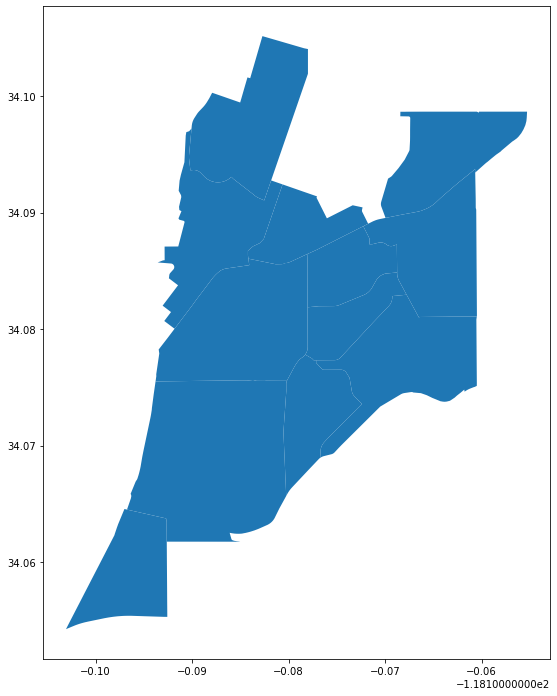

In [25]:
race_new.plot(figsize=(12,12))

yes, I missed a tract, seems like i missed 110. wow!

In [26]:
race[race.geoid == '14000US06037201110']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
495,14000US06037201110,"Census Tract 2011.10, Los Angeles, CA",2147.0,515.0,232.0,14.0,0.0,269.0,0.0,0.0,0.0,1632.0,"MULTIPOLYGON (((-118.18109 34.09448, -118.1803..."


In [27]:
race_new = race.loc[[495,496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 508]]

race_new

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
495,14000US06037201110,"Census Tract 2011.10, Los Angeles, CA",2147.0,515.0,232.0,14.0,0.0,269.0,0.0,0.0,0.0,1632.0,"MULTIPOLYGON (((-118.18109 34.09448, -118.1803..."
496,14000US06037201120,"Census Tract 2011.20, Los Angeles, CA",4144.0,817.0,362.0,54.0,0.0,331.0,0.0,9.0,61.0,3327.0,"MULTIPOLYGON (((-118.17043 34.09075, -118.1704..."
497,14000US06037201200,"Census Tract 2012, Los Angeles, CA",2893.0,537.0,207.0,0.0,0.0,311.0,0.0,0.0,19.0,2356.0,"MULTIPOLYGON (((-118.18421 34.08673, -118.1836..."
498,14000US06037201301,"Census Tract 2013.01, Los Angeles, CA",4498.0,1040.0,225.0,102.0,0.0,710.0,0.0,3.0,0.0,3458.0,"MULTIPOLYGON (((-118.19304 34.08590, -118.1929..."
499,14000US06037201302,"Census Tract 2013.02, Los Angeles, CA",4341.0,3205.0,910.0,240.0,0.0,1825.0,0.0,78.0,152.0,1136.0,"MULTIPOLYGON (((-118.19032 34.09492, -118.1900..."
500,14000US06037201401,"Census Tract 2014.01, Los Angeles, CA",4693.0,1143.0,325.0,47.0,152.0,470.0,0.0,0.0,149.0,3550.0,"MULTIPOLYGON (((-118.19377 34.07560, -118.1937..."
501,14000US06037201402,"Census Tract 2014.02, Los Angeles, CA",4995.0,1280.0,190.0,42.0,0.0,948.0,0.0,53.0,47.0,3715.0,"MULTIPOLYGON (((-118.19634 34.06547, -118.1963..."
502,14000US06037201501,"Census Tract 2015.01, Los Angeles, CA",5367.0,925.0,502.0,55.0,0.0,340.0,0.0,18.0,10.0,4442.0,"MULTIPOLYGON (((-118.17225 34.08884, -118.1717..."
503,14000US06037201503,"Census Tract 2015.03, Los Angeles, CA",3364.0,455.0,178.0,36.0,0.0,241.0,0.0,0.0,0.0,2909.0,"MULTIPOLYGON (((-118.17807 34.08644, -118.1770..."
504,14000US06037201504,"Census Tract 2015.04, Los Angeles, CA",2302.0,474.0,242.0,23.0,0.0,125.0,0.0,0.0,84.0,1828.0,"MULTIPOLYGON (((-118.17823 34.07788, -118.1781..."


<AxesSubplot:>

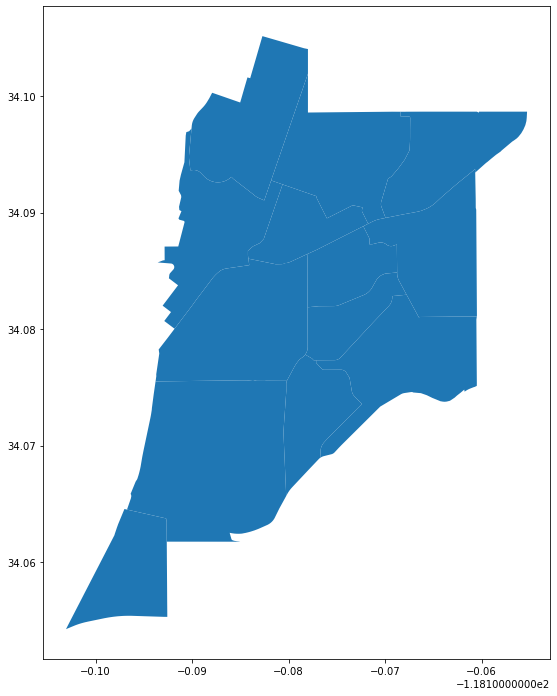

In [28]:
race_new.plot(figsize=(12,12))

oomg there we gooooo! okay. I am going to map with the percentages of pop.

In [29]:
list(race_new)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [30]:
race_new['Percent Non Hispanic'] = race_new['Non Hispanic']/race_new['Total']*100
race_new['Percent Hispanic'] = race_new['Hispanic']/race_new['Total']*100
race_new['Percent Non Hispanic White'] = race_new['Non Hispanic White']/race_new['Total']*100
race_new['Percent Non Hispanic Black'] = race_new['Non Hispanic Black']/race_new['Total']*100
race_new['Percent Non Hispanic American Indian and Alaska Native'] = race_new['Non Hispanic American Indian and Alaska Native']/race_new['Total']*100
race_new['Percent Non Hispanic Asian'] = race_new['Non Hispanic Asian']/race_new['Total']*100
race_new['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = race_new['Non Hispanic Native Hawaiian and Other Pacific Islander']/race_new['Total']*100
race_new['Percent Non Hispanic Some other race'] = race_new['Non Hispanic Some other race']/race_new['Total']*100
race_new['Percent Non Hispanic Two or more races'] = race_new['Non Hispanic Two or more races']/race_new['Total']*100

race_new

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
495,14000US06037201110,"Census Tract 2011.10, Los Angeles, CA",2147.0,515.0,232.0,14.0,0.0,269.0,0.0,0.0,...,"MULTIPOLYGON (((-118.18109 34.09448, -118.1803...",23.986959,76.013041,10.805776,0.652073,0.000000,12.529110,0.0,0.000000,0.000000
496,14000US06037201120,"Census Tract 2011.20, Los Angeles, CA",4144.0,817.0,362.0,54.0,0.0,331.0,0.0,9.0,...,"MULTIPOLYGON (((-118.17043 34.09075, -118.1704...",19.715251,80.284749,8.735521,1.303089,0.000000,7.987452,0.0,0.217181,1.472008
497,14000US06037201200,"Census Tract 2012, Los Angeles, CA",2893.0,537.0,207.0,0.0,0.0,311.0,0.0,0.0,...,"MULTIPOLYGON (((-118.18421 34.08673, -118.1836...",18.562046,81.437954,7.155202,0.000000,0.000000,10.750086,0.0,0.000000,0.656758
498,14000US06037201301,"Census Tract 2013.01, Los Angeles, CA",4498.0,1040.0,225.0,102.0,0.0,710.0,0.0,3.0,...,"MULTIPOLYGON (((-118.19304 34.08590, -118.1929...",23.121387,76.878613,5.002223,2.267675,0.000000,15.784793,0.0,0.066696,0.000000
499,14000US06037201302,"Census Tract 2013.02, Los Angeles, CA",4341.0,3205.0,910.0,240.0,0.0,1825.0,0.0,78.0,...,"MULTIPOLYGON (((-118.19032 34.09492, -118.1900...",73.830915,26.169085,20.962912,5.528680,0.000000,42.041004,0.0,1.796821,3.501497
500,14000US06037201401,"Census Tract 2014.01, Los Angeles, CA",4693.0,1143.0,325.0,47.0,152.0,470.0,0.0,0.0,...,"MULTIPOLYGON (((-118.19377 34.07560, -118.1937...",24.355423,75.644577,6.925208,1.001492,3.238866,10.014916,0.0,0.000000,3.174941
501,14000US06037201402,"Census Tract 2014.02, Los Angeles, CA",4995.0,1280.0,190.0,42.0,0.0,948.0,0.0,53.0,...,"MULTIPOLYGON (((-118.19634 34.06547, -118.1963...",25.625626,74.374374,3.803804,0.840841,0.000000,18.978979,0.0,1.061061,0.940941
502,14000US06037201501,"Census Tract 2015.01, Los Angeles, CA",5367.0,925.0,502.0,55.0,0.0,340.0,0.0,18.0,...,"MULTIPOLYGON (((-118.17225 34.08884, -118.1717...",17.234954,82.765046,9.353456,1.024781,0.000000,6.335010,0.0,0.335383,0.186324
503,14000US06037201503,"Census Tract 2015.03, Los Angeles, CA",3364.0,455.0,178.0,36.0,0.0,241.0,0.0,0.0,...,"MULTIPOLYGON (((-118.17807 34.08644, -118.1770...",13.525565,86.474435,5.291320,1.070155,0.000000,7.164090,0.0,0.000000,0.000000
504,14000US06037201504,"Census Tract 2015.04, Los Angeles, CA",2302.0,474.0,242.0,23.0,0.0,125.0,0.0,0.0,...,"MULTIPOLYGON (((-118.17823 34.07788, -118.1781...",20.590791,79.409209,10.512598,0.999131,0.000000,5.430061,0.0,0.000000,3.649001


<AxesSubplot:>

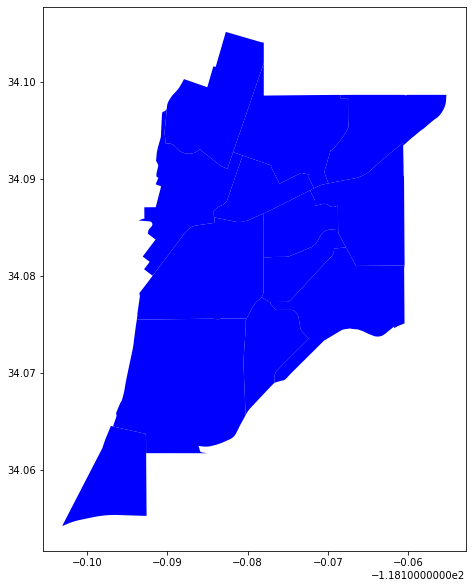

In [31]:
race_new[race_new['Hispanic'] > 50].plot(figsize=(12,10),color="blue")

Text(0.5, 1.0, 'Percent Non Hispanic Black')

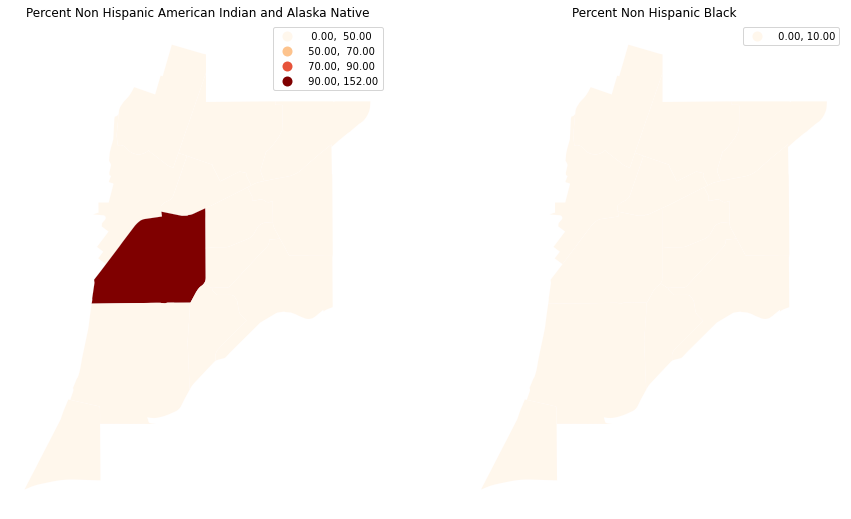

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs
race_new.plot(column='Non Hispanic American Indian and Alaska Native', 
            cmap='OrRd', 
            scheme='user_defined',
            classification_kwds={'bins':[50,70,90]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Non Hispanic American Indian and Alaska Native")

race_new.plot(column='Percent Non Hispanic Black', 
            cmap='OrRd', 
            scheme='user_defined',
            classification_kwds={'bins':[10]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic Black")

I was trying to narrow down my scope to this commmunity and it worked. Now I have to merge it with my partners vacant lot map and get a better story of the open space in the area. 